In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import gc
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28

In [2]:
from matplotlib.ticker import FuncFormatter
# ##########################################################
# Format tick labels using their exponent only... 
# ##########################################################
def formatter(x,pos):
    return format(np.log10(x), '.0f')

In [4]:
prefix = "./"
# z=8, i=0 : -121.77, -104.01, -203.10
# z=8, i=265793 : -0.88, 215.56, 143.27
# z=8, i=531586 : 77.55, 54.08, 218.96
# z=8, i=797379 : 137.45, -200.82, -220.27
# z=16, i=0 : -20.26, -122.12, 40.22
# z=16, i=770 : 43.96, 26.56, 121.94
# z=16, i=1540 : 44.54, 19.03, 118.77

z = "8.0"; i = "265793" 
totSPM = np.loadtxt(prefix + "totSM_z" + z + "-" + i +".txt")
ppfSPM = np.loadtxt(prefix + "pristSM_z" + z + "-" + i +".txt")
ppzSPM = np.loadtxt(prefix + "primordSM_z" + z + "-" + i +".txt")

In [5]:
# Slightly offset bins so we can see the data.
xrange1 = np.logspace(-10,0,51) # 1e-10, 1e-9.8, 1e-9.6, ... 
xrange2 = np.logspace(-9.98,0.02,51) # 1e-9.96, 1e-9.76, 1e-9.56, ... 
xrange3 = np.logspace(-9.96,0.04,51) # 1e-9.92, 1e-9.72, 1e-9.52, ... 
xrange4 = np.logspace(-9.94,0.06,51) # 1e-9.92, 1e-9.72, 1e-9.52, ... 

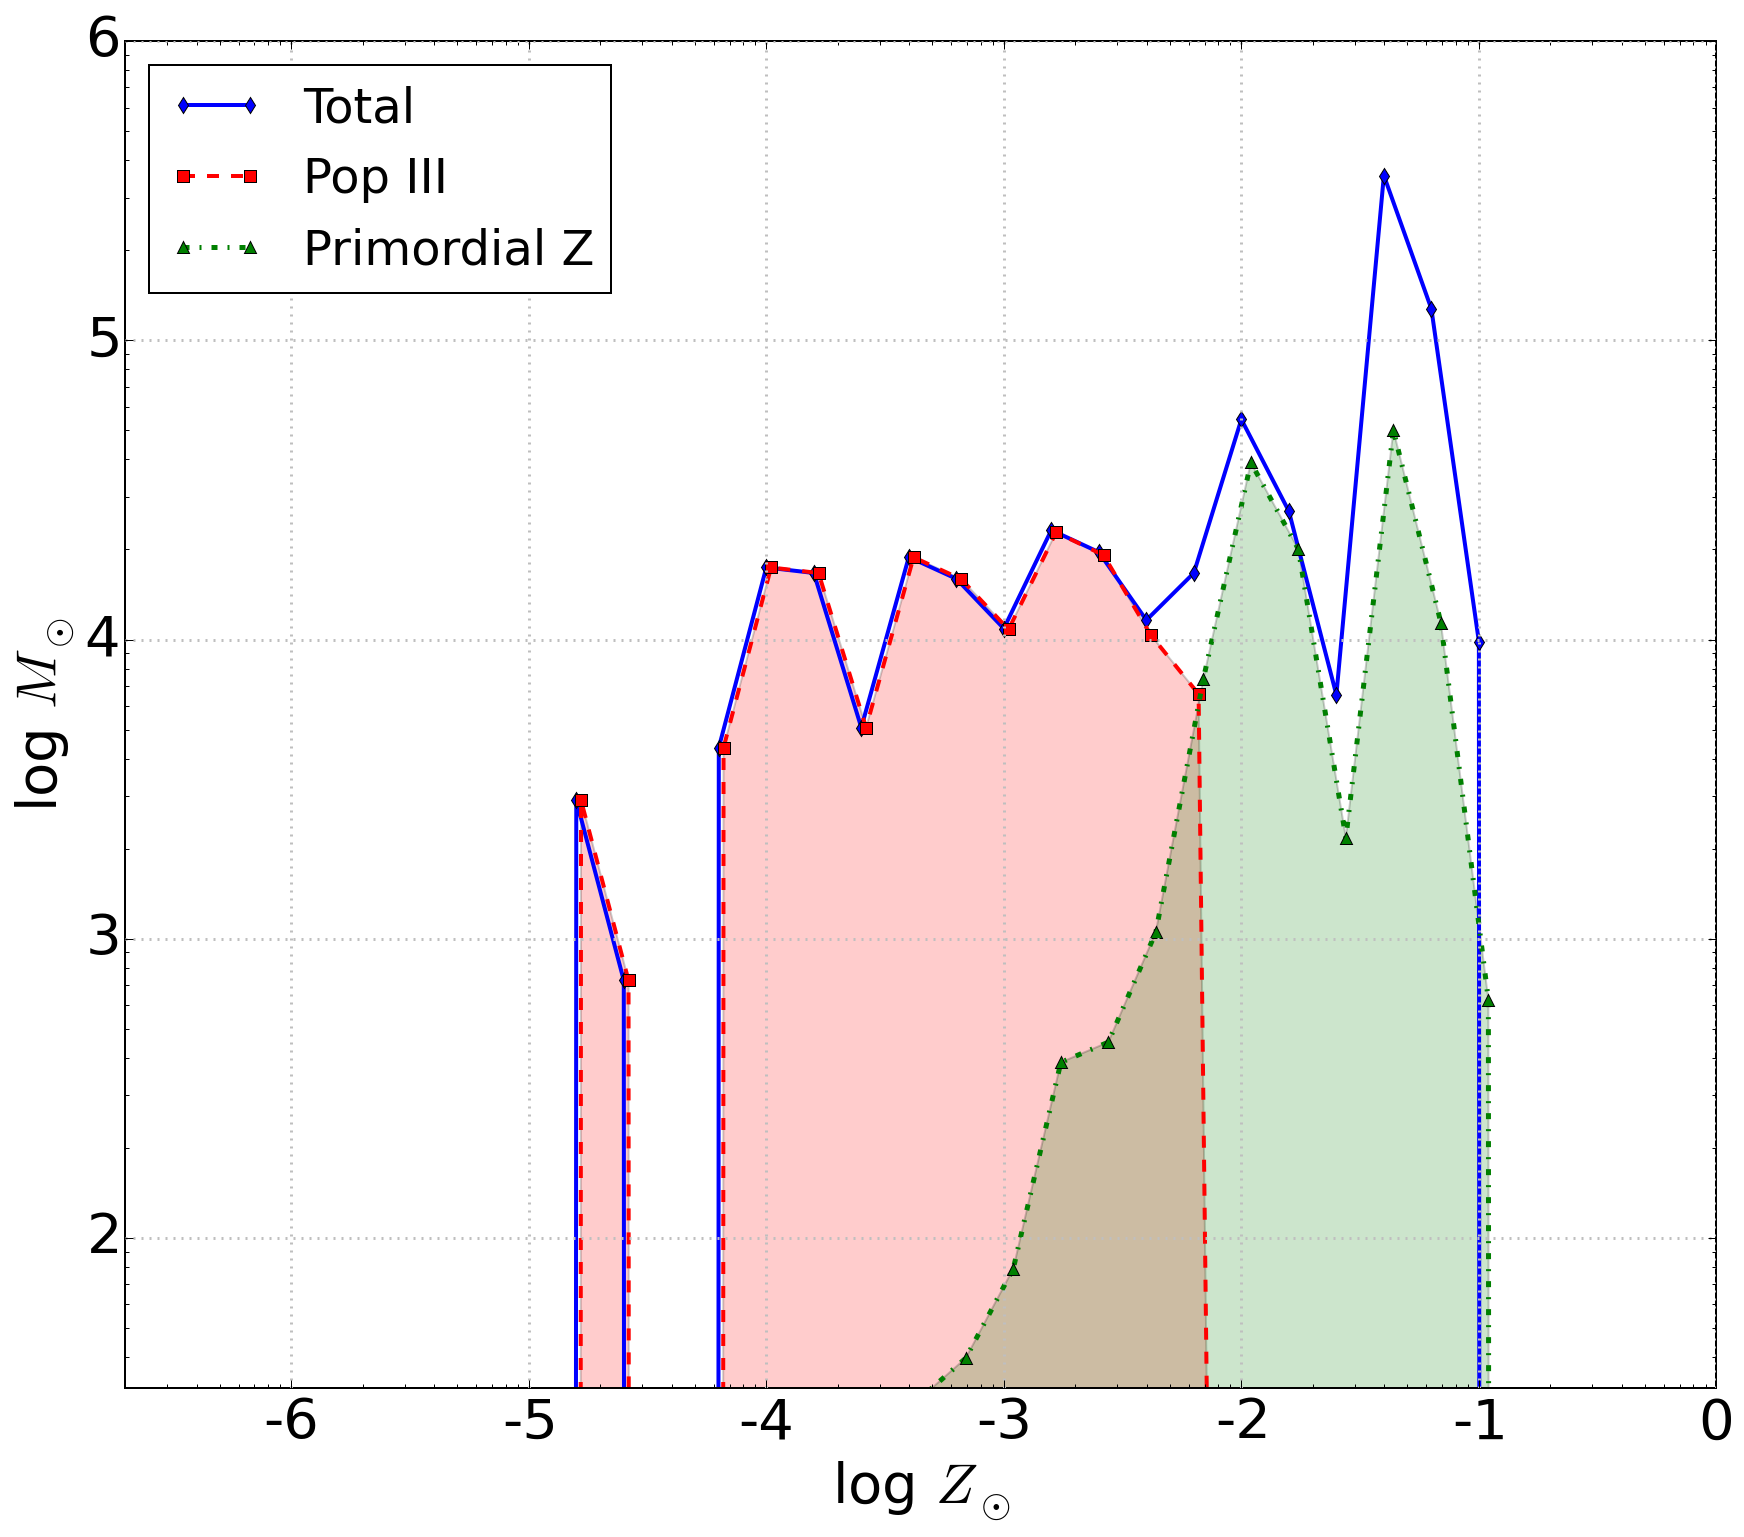

In [8]:
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)
custom_formatter = FuncFormatter(formatter)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([2*10**-7,1])
axHist.set_ylim([10**1.5,10**6.0])

axHist.set_xlabel("log $Z_{\odot}$", size=28)
axHist.set_ylabel('log $M_{\odot}$', size=28)

axHist.plot(xrange1[1:51],totSPM,'b-d',  linewidth = 2.0)
axHist.plot(xrange2[1:51],ppfSPM, 'r--s', linewidth = 2.0 )
axHist.plot(xrange3[1:51],ppzSPM,'g-.^', linewidth = 2.5 )
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)
axHist.fill_between(xrange2[1:51], 0, ppfSPM, facecolor='r', alpha=0.2)
axHist.fill_between(xrange3[1:51], 0, ppzSPM, facecolor='g', alpha=0.2)

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total','Pop III','Primordial Z'],loc='upper left', fontsize=24 )
plt.savefig("Histz="+z+"SFRegion.pdf")
plt.show()

In [62]:
ppfSPM

array([     0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,   2176.66824298,
         1451.03092304,   1450.91053751,    725.38393511,   9427.62441807,
         9738.15390434,   5615.46317249,  10922.14244819,   7816.17652597,
         1998.13245206,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ])

In [9]:
prefix = "./"
# z=8, i=0 : -121.77, -104.01, -203.10
# z=8, i=265793 : -0.88, 215.56, 143.27
# z=8, i=531586 : 77.55, 54.08, 218.96
# z=8, i=797379 : 137.45, -200.82, -220.27
# z=16, i=0 : -20.26, -122.12, 40.22
# z=16, i=770 : 43.96, 26.56, 121.94
# z=16, i=1540 : 44.54, 19.03, 118.77

z = "8.0"; i = "265793" 
totSPM = np.loadtxt(prefix + "totSM_z" + z + "-" + i +".txt")
ppfSPM = np.loadtxt(prefix + "pristSM_z" + z + "-" + i +".txt")
ppzSPM = np.loadtxt(prefix + "primordSM_z" + z + "-" + i +".txt")
#polSPM = totSPM - ppfSPM

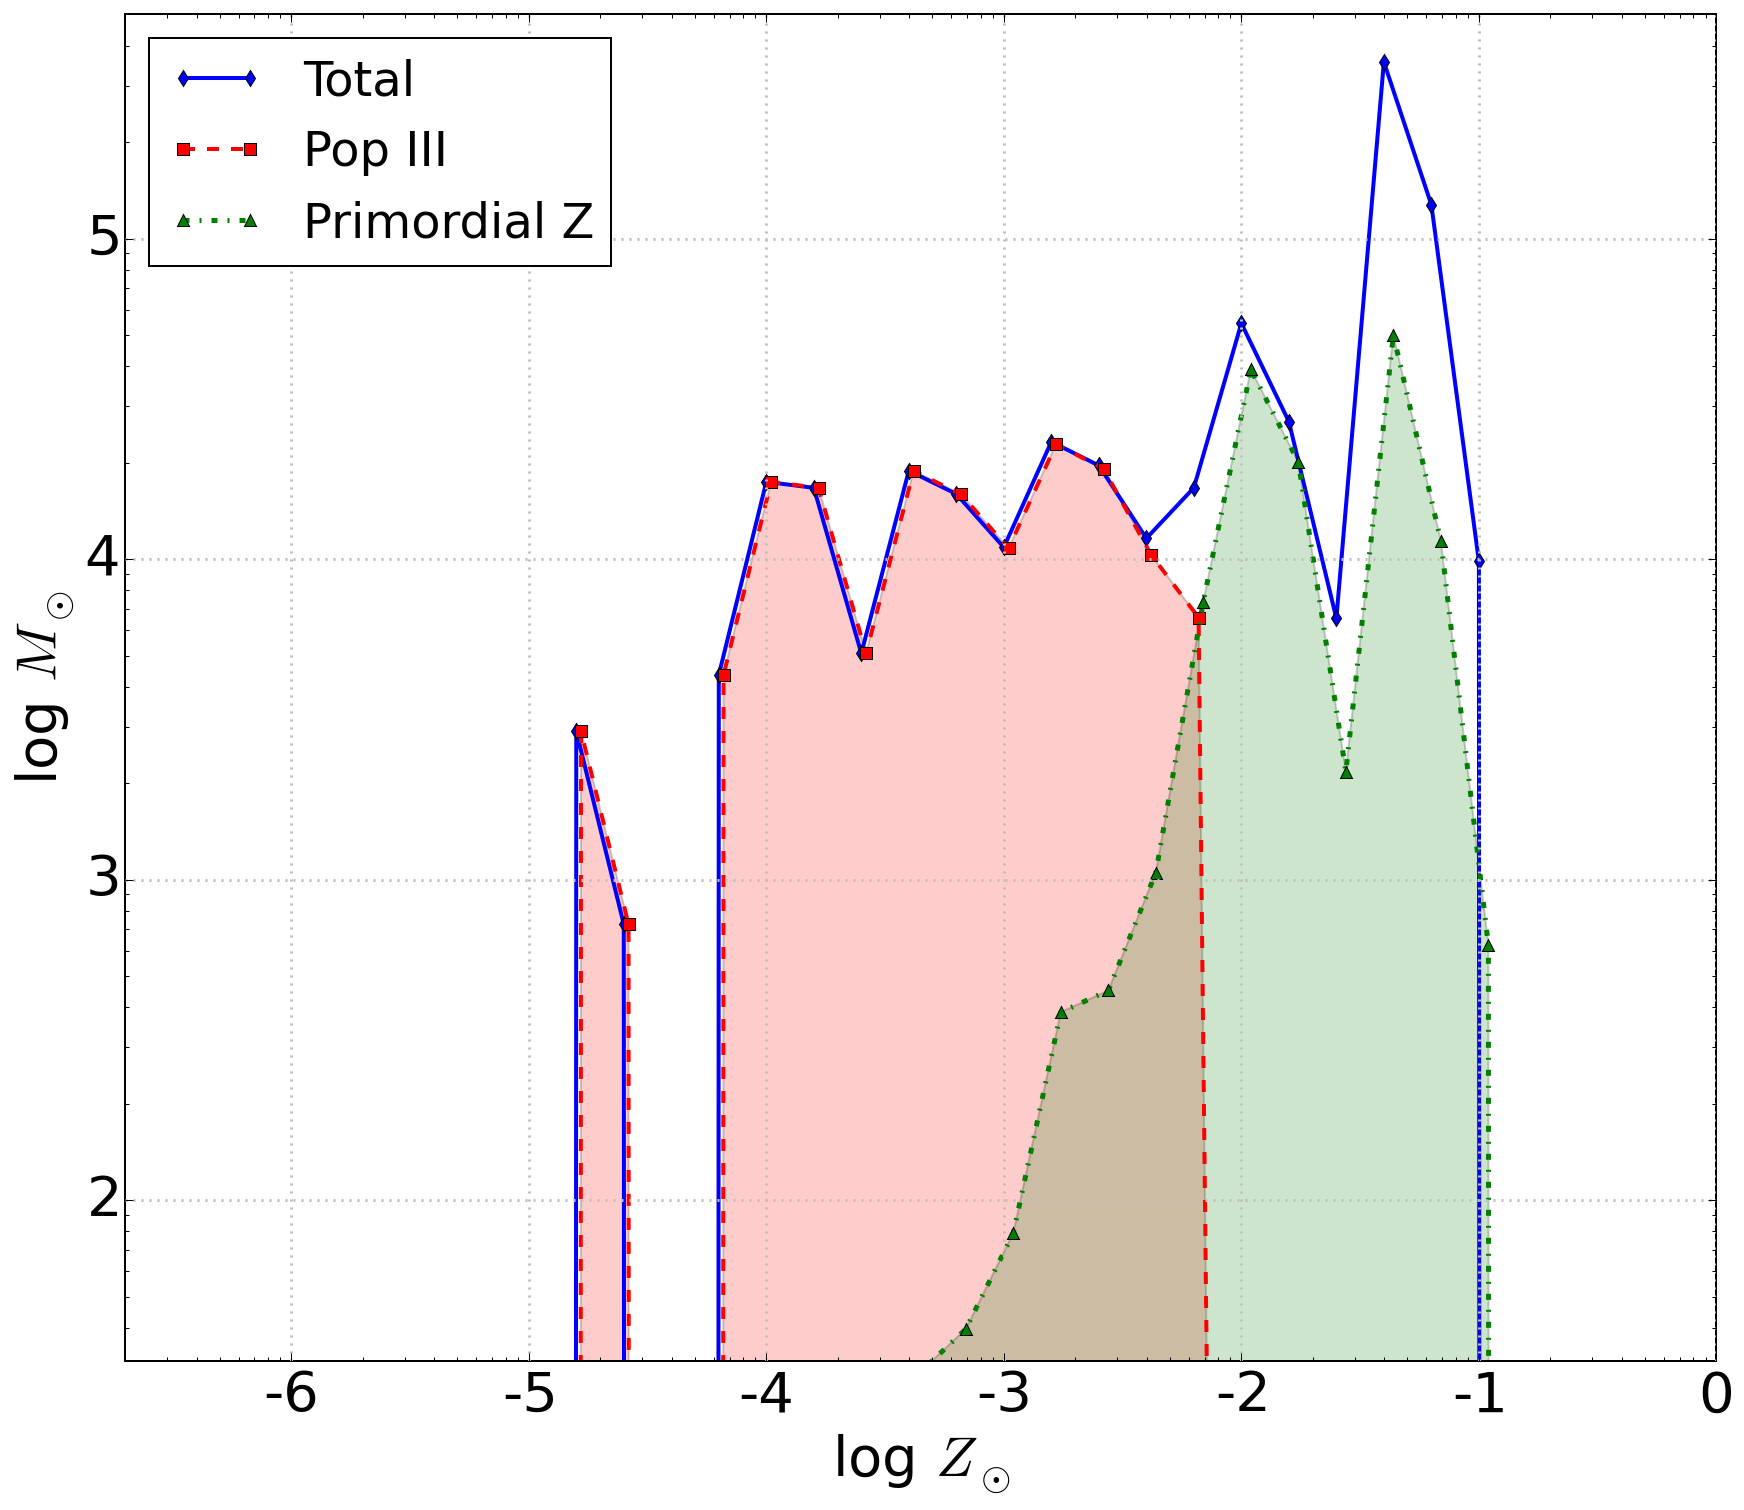

In [11]:
# Correcting... 
#cond = ppzSPM>totSPM
#ppzSPM[cond] = totSPM[cond]
custom_formatter = FuncFormatter(formatter)


histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([2*10**-7,1])
axHist.set_ylim([10**1.5,10**5.7])


axHist.set_xlabel("log $Z_{\odot}$", size=28)
axHist.set_ylabel('log $M_{\odot}$', size=28)

axHist.plot(xrange1[1:51],totSPM,'b-d',  linewidth = 2.0)
axHist.plot(xrange2[1:51],ppfSPM, 'r--s', linewidth = 2.0 )
axHist.plot(xrange3[1:51],ppzSPM,'g-.^', linewidth = 2.5 )
#axHist.plot(xrange4[0:50],polSPM,'m-.^', linewidth = 2.0 )
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)
axHist.fill_between(xrange2[1:51], 0, ppfSPM, facecolor='r', alpha=0.2)
axHist.fill_between(xrange3[1:51], 0, ppzSPM, facecolor='g', alpha=0.2)

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total','Pop III','Primordial Z'],loc='upper left', fontsize=24 )
#axHist.legend(['Total','Pop III','Primordial Z','Polluted'],loc='upper left', fontsize=24 )
plt.savefig("Histz="+z+"SFRegion.pdf")
plt.show()



In [25]:
#z = "5.0"; i = "0"
#z = "5.0"; i = "1281414"
z = "5.0"; i = "2562828"
#z = "5.0"; i = "3844242"
totSPM = np.loadtxt(prefix + "totSM_z" + z + "-" + i +".txt")
ppfSPM = np.loadtxt(prefix + "pristSM_z" + z + "-" + i +".txt")
ppzSPM = np.loadtxt(prefix + "primordSM_z" + z + "-" + i +".txt")
polSPM = totSPM - ppfSPM

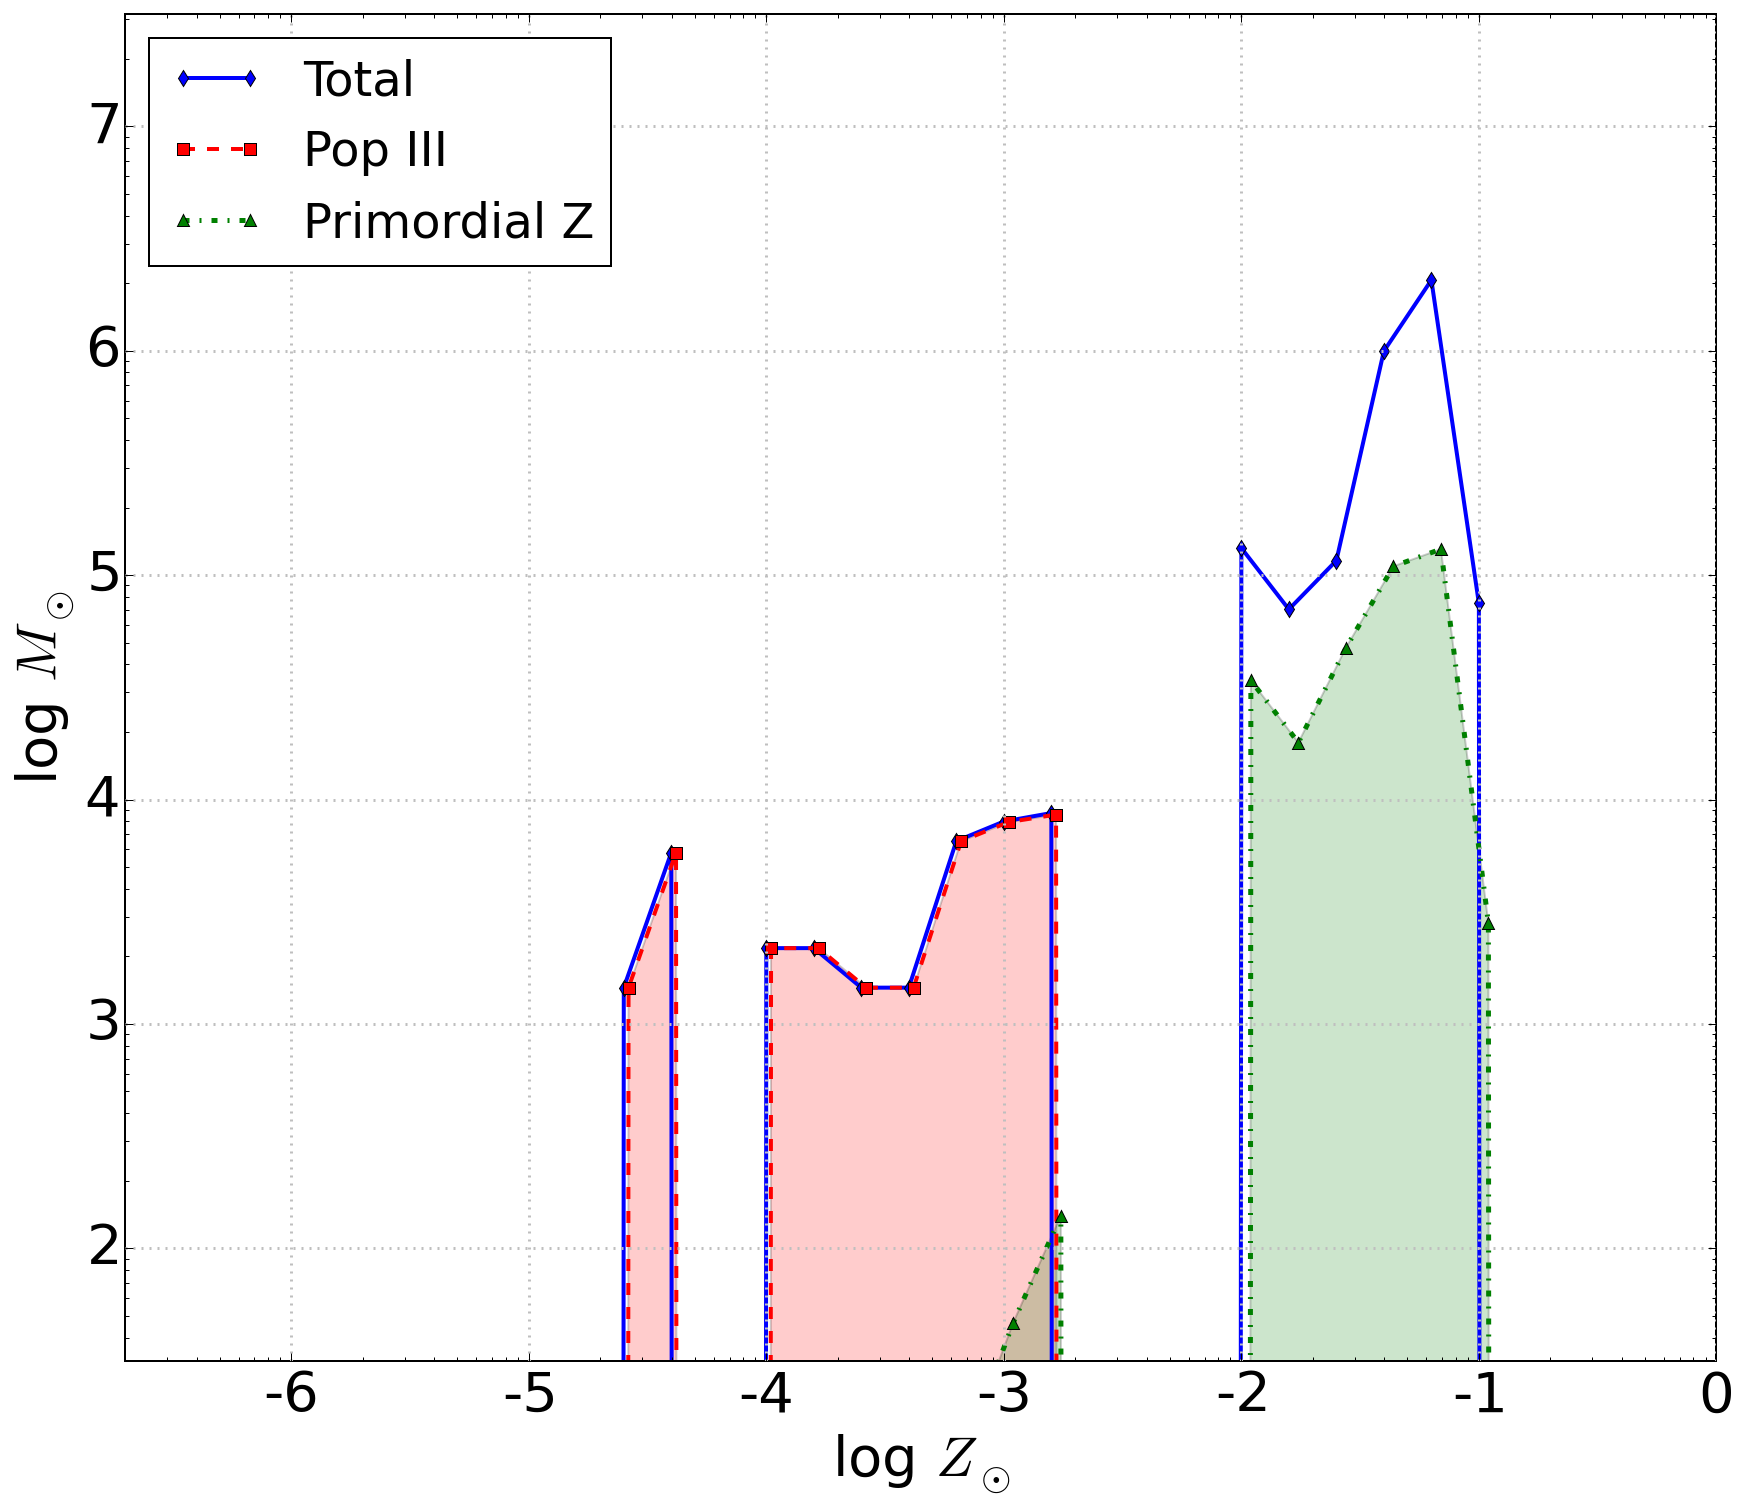

In [27]:
# Correcting... 
#cond = ppzSPM>totSPM
#ppzSPM[cond] = totSPM[cond]
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([2*10**-7,1])
axHist.set_ylim([10**1.5,10**7.5])

axHist.set_xlabel("log $Z_{\odot}$", size=28)
axHist.set_ylabel('log $M_{\odot}$', size=28)

axHist.plot(xrange1[1:51],totSPM,'b-d',  linewidth = 2.0)
axHist.plot(xrange2[1:51],ppfSPM, 'r--s', linewidth = 2.0 )
axHist.plot(xrange3[1:51],ppzSPM,'g-.^', linewidth = 2.5 )
#axHist.plot(xrange4[:50],polSPM,'m-.o', linewidth = 2.5 )
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)
axHist.fill_between(xrange2[1:51], 0, ppfSPM, facecolor='r', alpha=0.2)
axHist.fill_between(xrange3[1:51], 0, ppzSPM, facecolor='g', alpha=0.2)

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total','Pop III','Primordial Z'],loc='upper left', fontsize=24 )
plt.savefig("Histz="+z+"SFRegion.pdf")
plt.show()

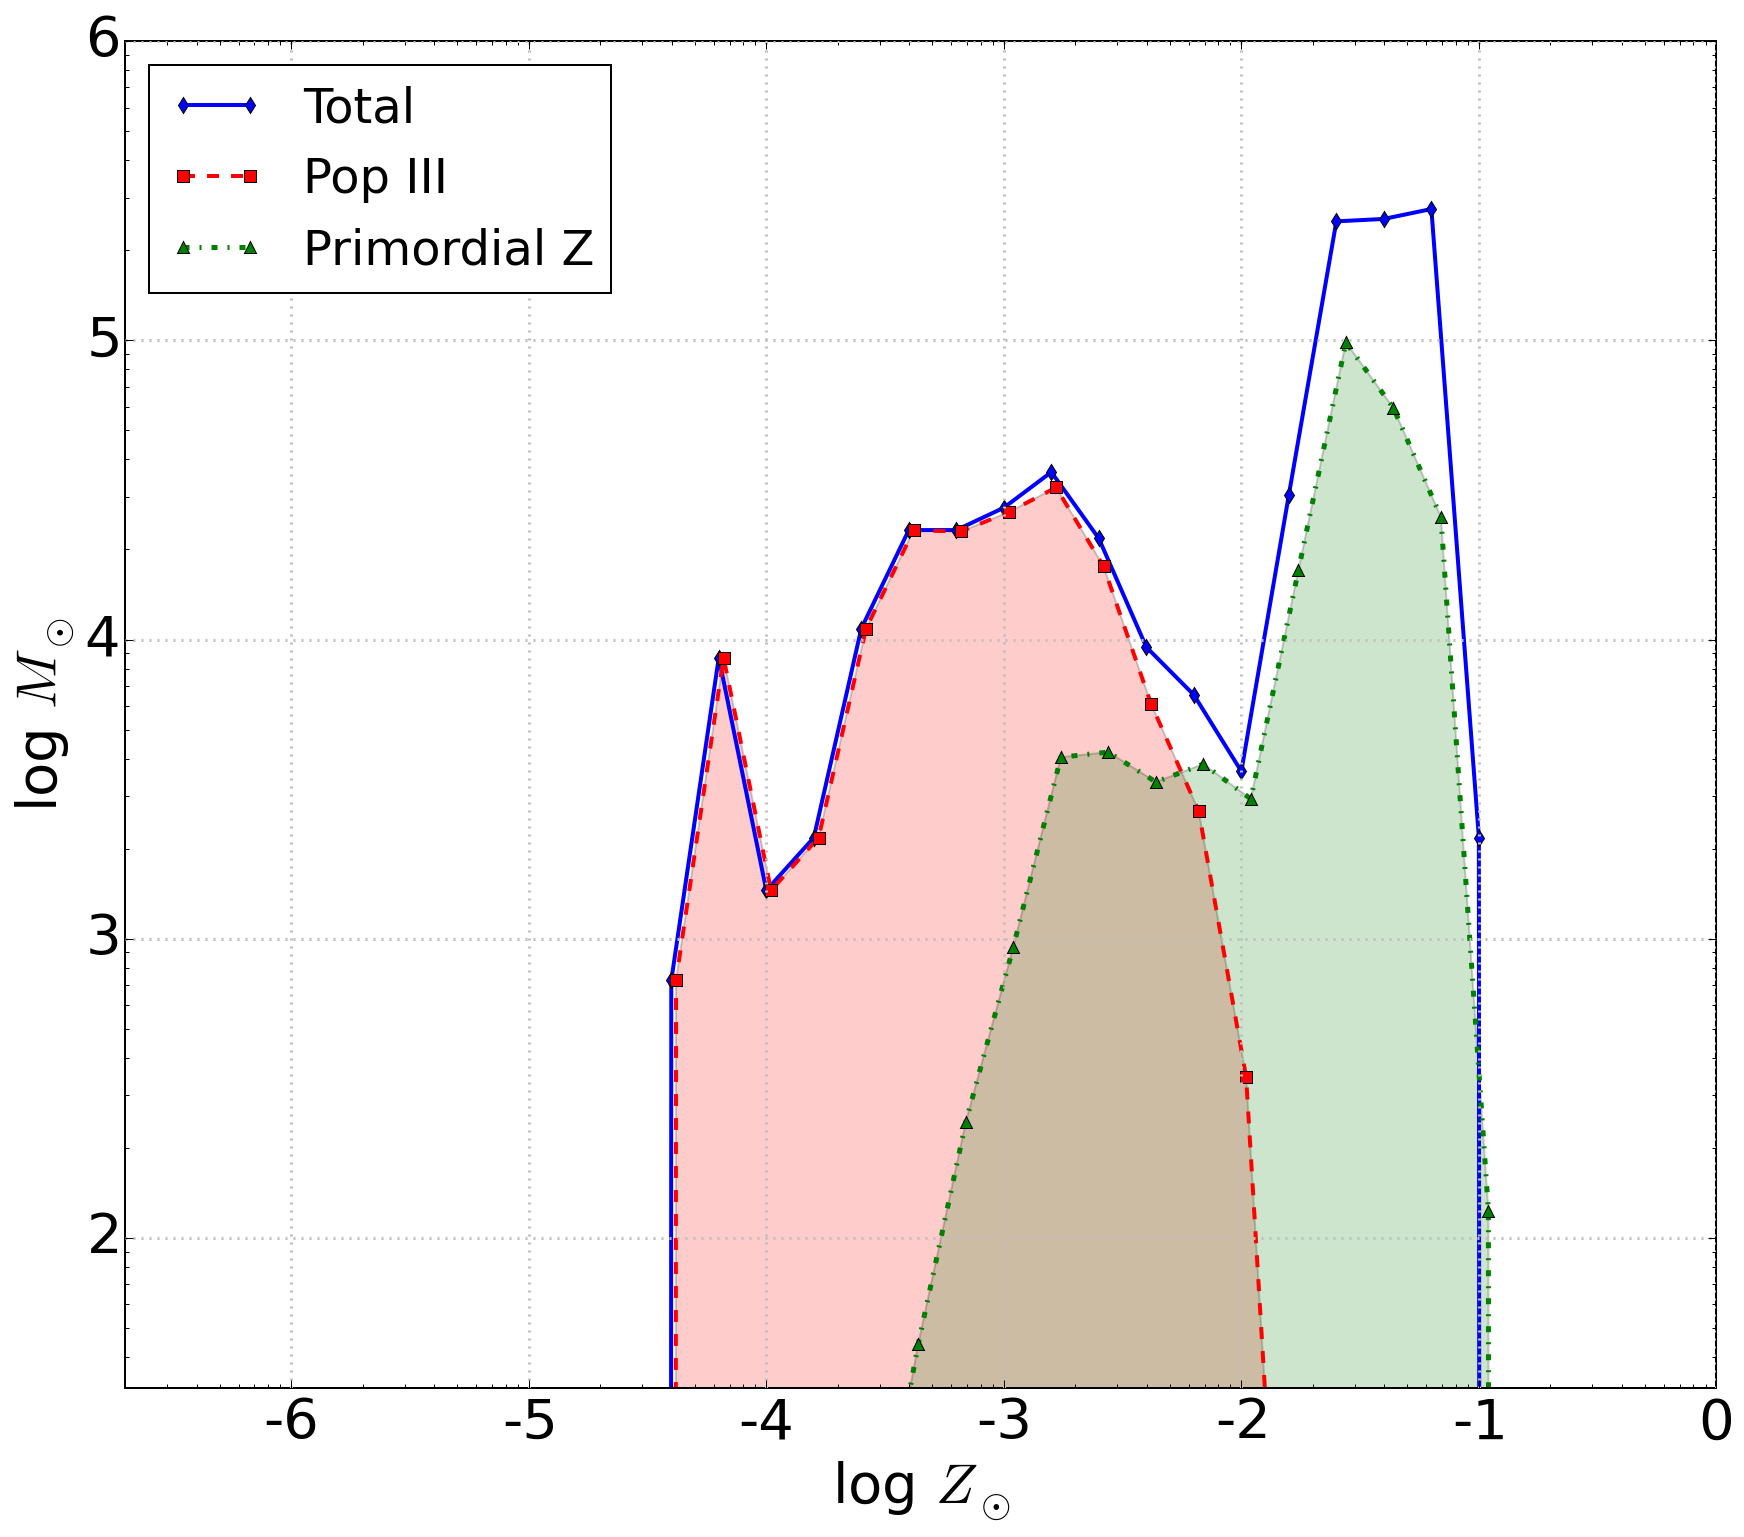

In [31]:
#z = "5.0"; i = "0"
#z = "5.0"; i = "1281414"
z = "10.0"; i = "70702"
#z = "5.0"; i = "3844242"
totSPM = np.loadtxt(prefix + "totSM_z" + z + "-" + i +".txt")
ppfSPM = np.loadtxt(prefix + "pristSM_z" + z + "-" + i +".txt")
ppzSPM = np.loadtxt(prefix + "primordSM_z" + z + "-" + i +".txt")
polSPM = totSPM - ppfSPM

histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([2*10**-7,1])
axHist.set_ylim([10**1.5,10**6.0])

axHist.set_xlabel("log $Z_{\odot}$", size=28)
axHist.set_ylabel('log $M_{\odot}$', size=28)

axHist.plot(xrange1[1:51],totSPM,'b-d',  linewidth = 2.0)
axHist.plot(xrange2[1:51],ppfSPM, 'r--s', linewidth = 2.0 )
axHist.plot(xrange3[1:51],ppzSPM,'g-.^', linewidth = 2.5 )
#axHist.plot(xrange4[:50],polSPM,'m-.o', linewidth = 2.5 )
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)
axHist.fill_between(xrange2[1:51], 0, ppfSPM, facecolor='r', alpha=0.2)
axHist.fill_between(xrange3[1:51], 0, ppzSPM, facecolor='g', alpha=0.2)

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total','Pop III','Primordial Z'],loc='upper left', fontsize=24 )
plt.savefig("Histz="+z+"SFRegion.pdf")
plt.show()

In [28]:
totSPM,xrange1[1:51]

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.45118272e+03,
          5.80473087e+03,   0.00000000e+00,   2.17677407e+03,
          2.17677407e+03,   1.45118272e+03,   1.45118272e+03,
          6.53032222e+03,   7.98150494e+03,   8.70709630e+03,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.32057627e+05,   7.03823617e+04,   1.16094617e+05,
          9.96236935e+05,   2.06503301e+06,   7.48165312e+04,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

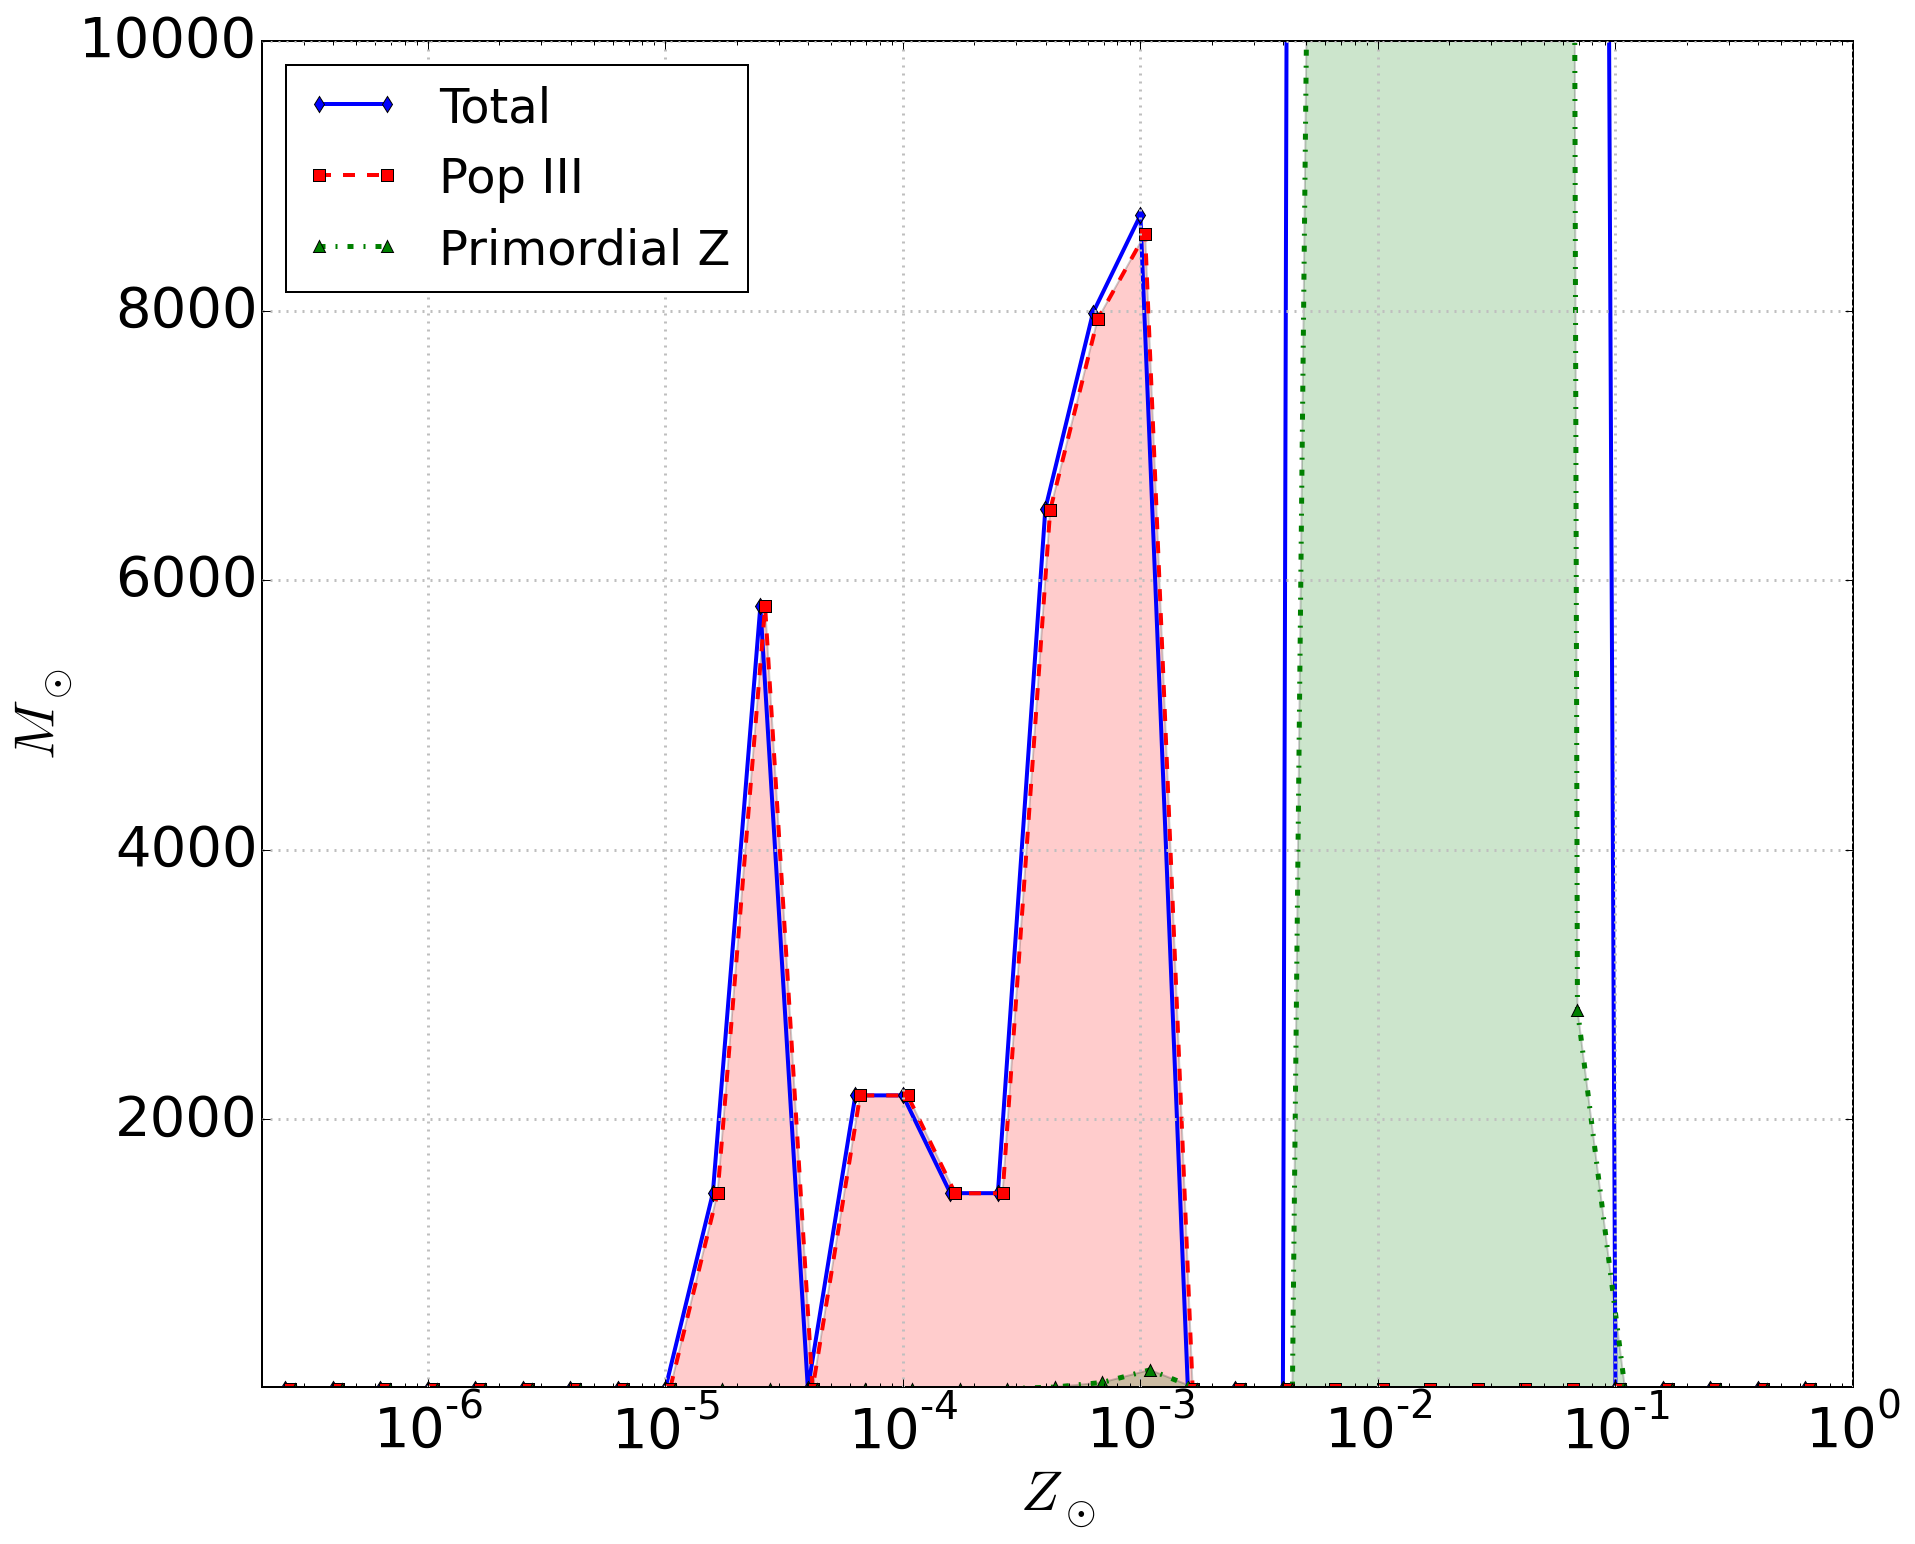

In [29]:
axHist   = plt.axes(histRect)

axHist.set_xscale('log')
#axHist.set_yscale('log')
axHist.set_xlim([2*10**-7,1])
axHist.set_ylim([10**1,10000])


axHist.set_xlabel("$Z_{\odot}$", size=28)
axHist.set_ylabel('$M_{\odot}$', size=28)

axHist.plot(xrange1[:50],totSPM,'b-d',  linewidth = 2.0)
axHist.plot(xrange2[:50],ppfSPM, 'r--s', linewidth = 2.0 )
axHist.plot(xrange3[:50],ppzSPM,'g-.^', linewidth = 2.5 )
axHist.fill_between(xrange2[:50], 0, ppfSPM, facecolor='r', alpha=0.2)
axHist.fill_between(xrange3[:50], 0, ppzSPM, facecolor='g', alpha=0.2)

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total','Pop III','Primordial Z'],loc='upper left', fontsize=24 )
plt.savefig("Histz="+z+"SFRegion_LinScale.pdf")
plt.show()

## Plot overall evolution... 

In [17]:
sfr = np.loadtxt(prefix + "new-data3Mpc.txt",skiprows=1)

In [18]:
# {
# {"z", "tStart", "tEnd", "totStarMass", "totPop3StarMass", 
#  "totPollStarMass", "totPrimordStarMass", "totGasMass", 
#  "totPristGasMass", "totSubcritStarMass", "totNonPrimordStarMass"}
#}

In [20]:
h = 0.71
deltaT = sfr[:, 2] - sfr[:, 1]
nmlze  = 1.0 / deltaT / (3.0**3) * h**3

In [21]:
zData       = sfr[:,0]
totStarMass = sfr[:,3] * nmlze
popIIIMass  = sfr[:,4] * nmlze
pollMass    = sfr[:,5] * nmlze
primordMass = sfr[:,6] * nmlze
pristMass   = sfr[:,8] * nmlze
subCritMass = sfr[:,9] * nmlze

In [22]:
# Load PallottiniPopIII.txt
# Alread (x,log sfr)
pal = np.loadtxt(prefix + "PallottiniPopIII.txt",skiprows=1)
pz   = pal[:,0]
psfr = 10**pal[:,1]

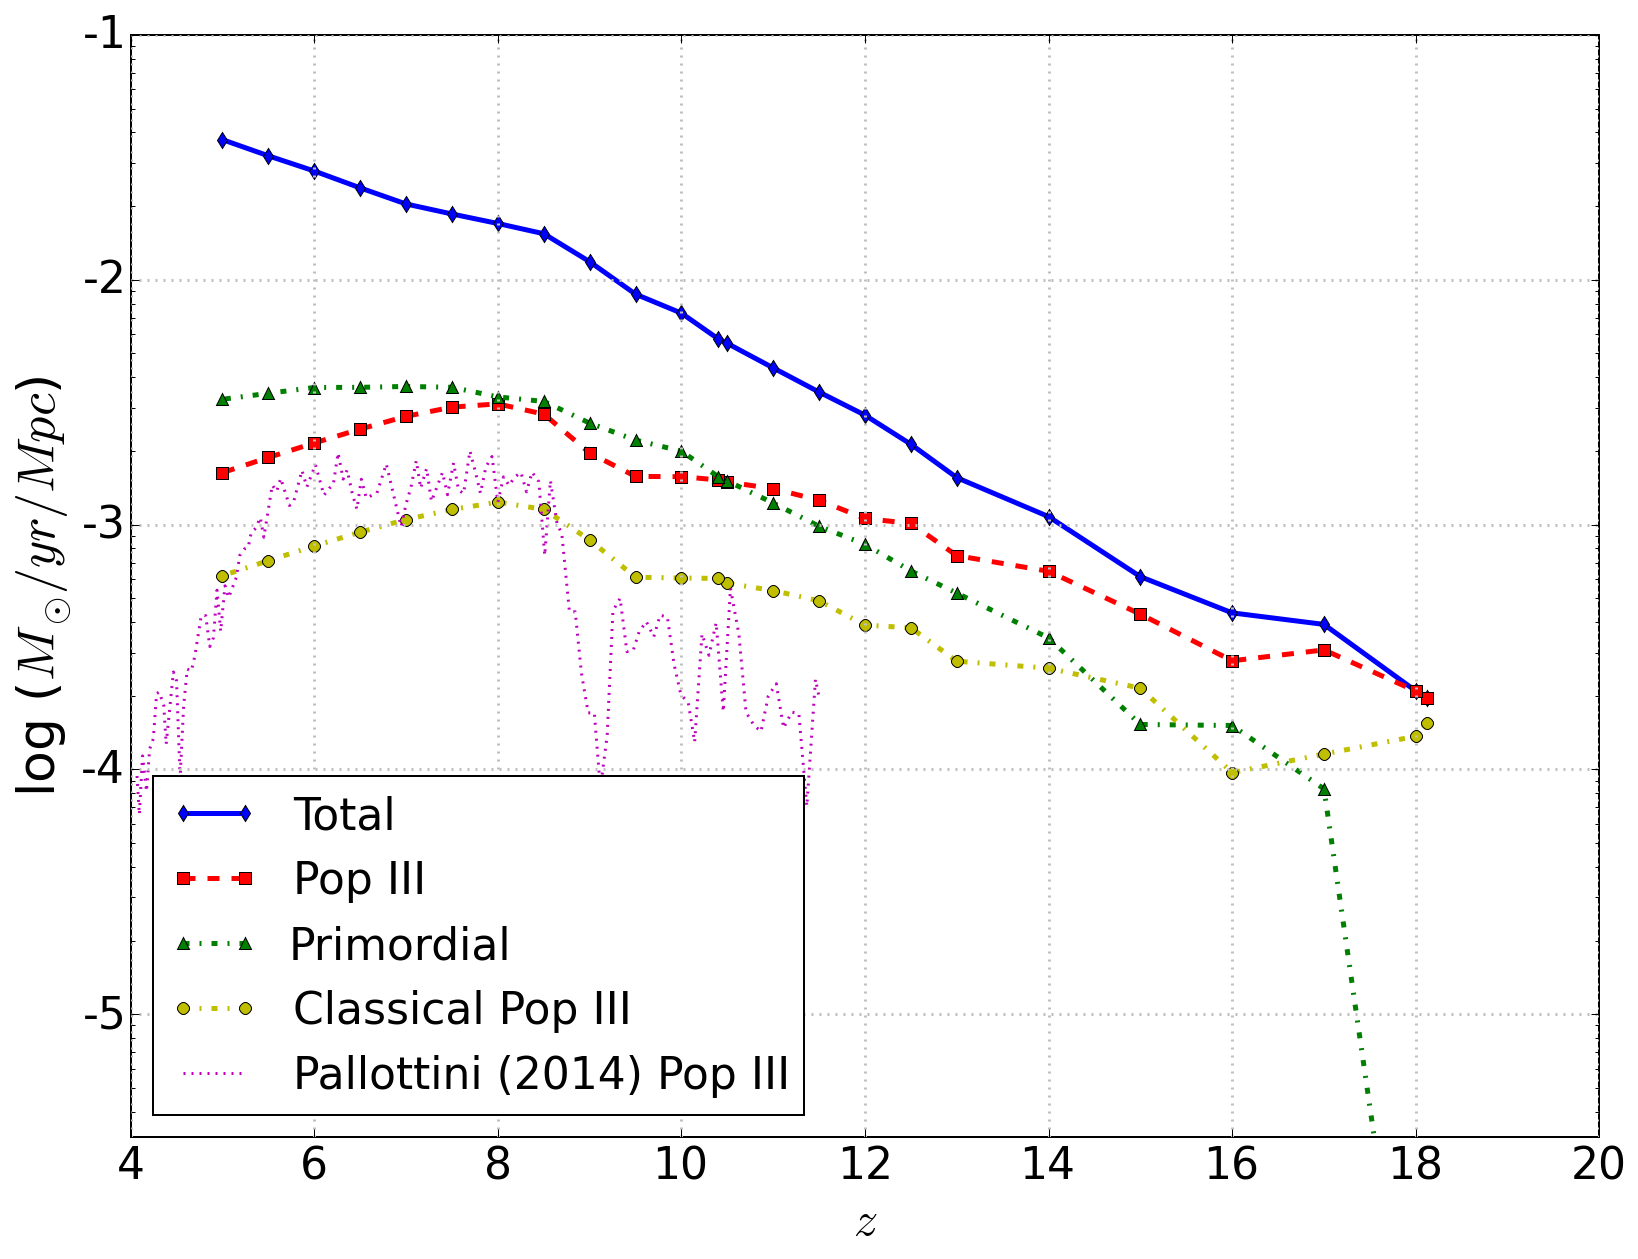

In [23]:
# FuncFormatter class instance defined from the function above
custom_formatter = FuncFormatter(formatter)

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 22

sfrRect = [0.1, 0.1, .85, 0.85]
axSFR   = plt.axes(sfrRect)

axSFR.set_yscale('log')
axSFR.set_ylim([10**-5.5,10**-1])

axSFR.set_xlabel("$z$", size=24)
axSFR.set_ylabel('log ($M_{\odot}/yr/Mpc$)', size=26)

axSFR.semilogy(zData,totStarMass,'b-d',  linewidth = 2.5 )
axSFR.semilogy(zData,popIIIMass, 'r--s', linewidth = 2.5 )
axSFR.semilogy(zData,primordMass,'g-.^', linewidth = 2.5 )
axSFR.semilogy(zData,subCritMass,'y-.o', linewidth = 2.5 )
axSFR.semilogy(pz,psfr,'m:', linewidth = 1.5 )
axSFR.yaxis.set_major_formatter(custom_formatter)
axSFR.grid(color='0.75', linestyle=':', linewidth=1.5)
axSFR.legend(['Total','Pop III','Primordial','Classical Pop III',"Pallottini (2014) Pop III"],
             loc='lower left', fontsize=22 )
plt.savefig("sfr.pdf")
plt.show()

## Using halo data directly

In [12]:
z = 8.0
i = 265793
gc.collect()

1438

In [64]:
mass = np.loadtxt("spMassHaloOnly_%05.2f_%d.txt"%(z,i),skiprows=1)
Z    = np.loadtxt("spZHaloOnly_%05.2f_%d.txt"%(z,i),skiprows=1) # SOLAR units in the file... 
PZ   = np.loadtxt("spPZHaloOnly_%05.2f_%d.txt"%(z,i),skiprows=1) # SOLAR units in the file... 
PPF  = np.loadtxt("spPPFHaloOnly_%05.2f_%d.txt"%(z,i),skiprows=1) # SOLAR units in the file... 

In [65]:
PZ[(PZ<=1e-5) & (PZ != 0)]
Z[Z==0] = 10**-6.8

In [66]:
bins    = np.logspace(-10, 0, 51) # Log bins for histogram data 
psm     = np.zeros(len(bins)-1) # Pristine Stellar mass in that bin
tsm     = np.zeros(len(bins)-1) # total mass
primsm  = np.zeros(len(bins)-1) # Primordial stellar mass

# By using zsolar, we are binning in units of solar Z.
for indx2,j in enumerate(bins):
    if indx2 < len(bins)-1:
        cond = (Z >= j) & (Z < bins[indx2+1]) # This selects for sp's in the bin
        psm[indx2] = np.sum(PPF[cond] * mass[cond])
        tsm[indx2] = np.sum(mass[cond])
        # For sp's that are in our bin (above):
        #   Compute the polluted fraction (1-ppf)
        #   Compute the fraction of pristine metals: pzf/Z
        #   Compute the mass of polluted stars that are polluted only by pristine metals
        primsm[indx2] = np.sum((1.0-PPF[cond]) * (PZ[cond] / Z[cond]) * mass[cond])


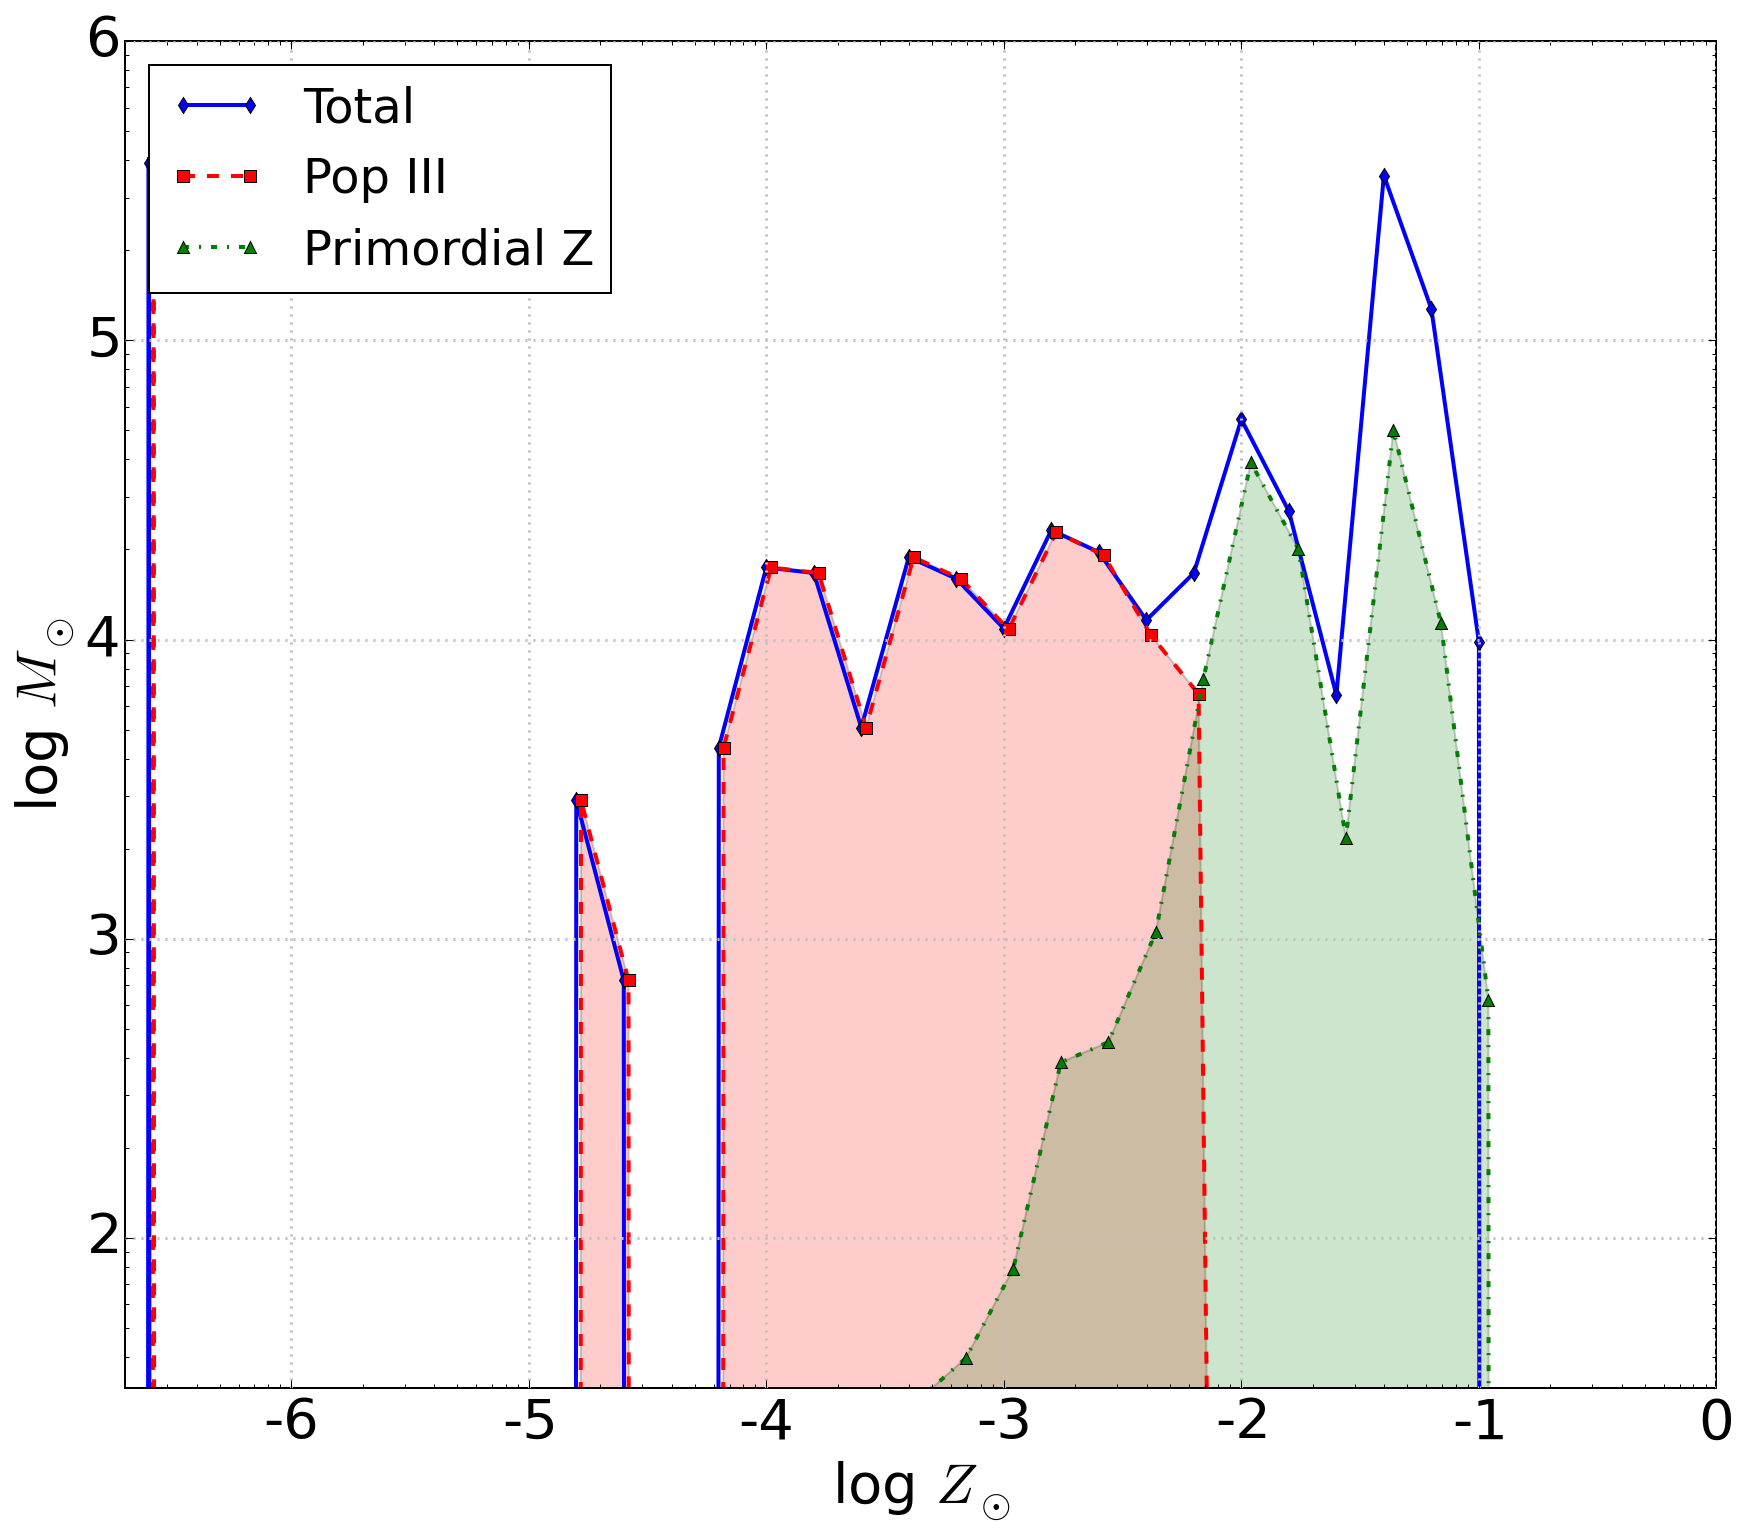

In [67]:
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)
custom_formatter = FuncFormatter(formatter)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([2*10**-7,1])
axHist.set_ylim([10**1.5,10**6.0])

axHist.set_xlabel("log $Z_{\odot}$", size=28)
axHist.set_ylabel('log $M_{\odot}$', size=28)

axHist.plot(xrange1[1:51],tsm,'b-d',  linewidth = 2.0)
axHist.plot(xrange2[1:51],psm, 'r--s', linewidth = 2.0 )
axHist.plot(xrange3[1:51],primsm,'g-.^', linewidth = 2.0 )
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)
axHist.fill_between(xrange2[1:51], 0, ppfSPM, facecolor='r', alpha=0.2)
axHist.fill_between(xrange3[1:51], 0, ppzSPM, facecolor='g', alpha=0.2)

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total','Pop III','Primordial Z'],loc='upper left', fontsize=24 )
plt.savefig("Hist_HaloData_z="+str(z)+"SFRegion.pdf")
plt.show()

In [68]:
# Slightly offset bins so we can see the data.
xrangeb1 = np.logspace(-10.2,-0.2,51) # 1e-10, 1e-9.8, 1e-9.6, ... 
xrangeb2 = np.logspace(-9.96,0.04,51) # 1e-9.96, 1e-9.76, 1e-9.56, ... 
xrangeb3 = np.logspace(-9.90,0.1,51) # 1e-9.92, 1e-9.72, 1e-9.52, ... 

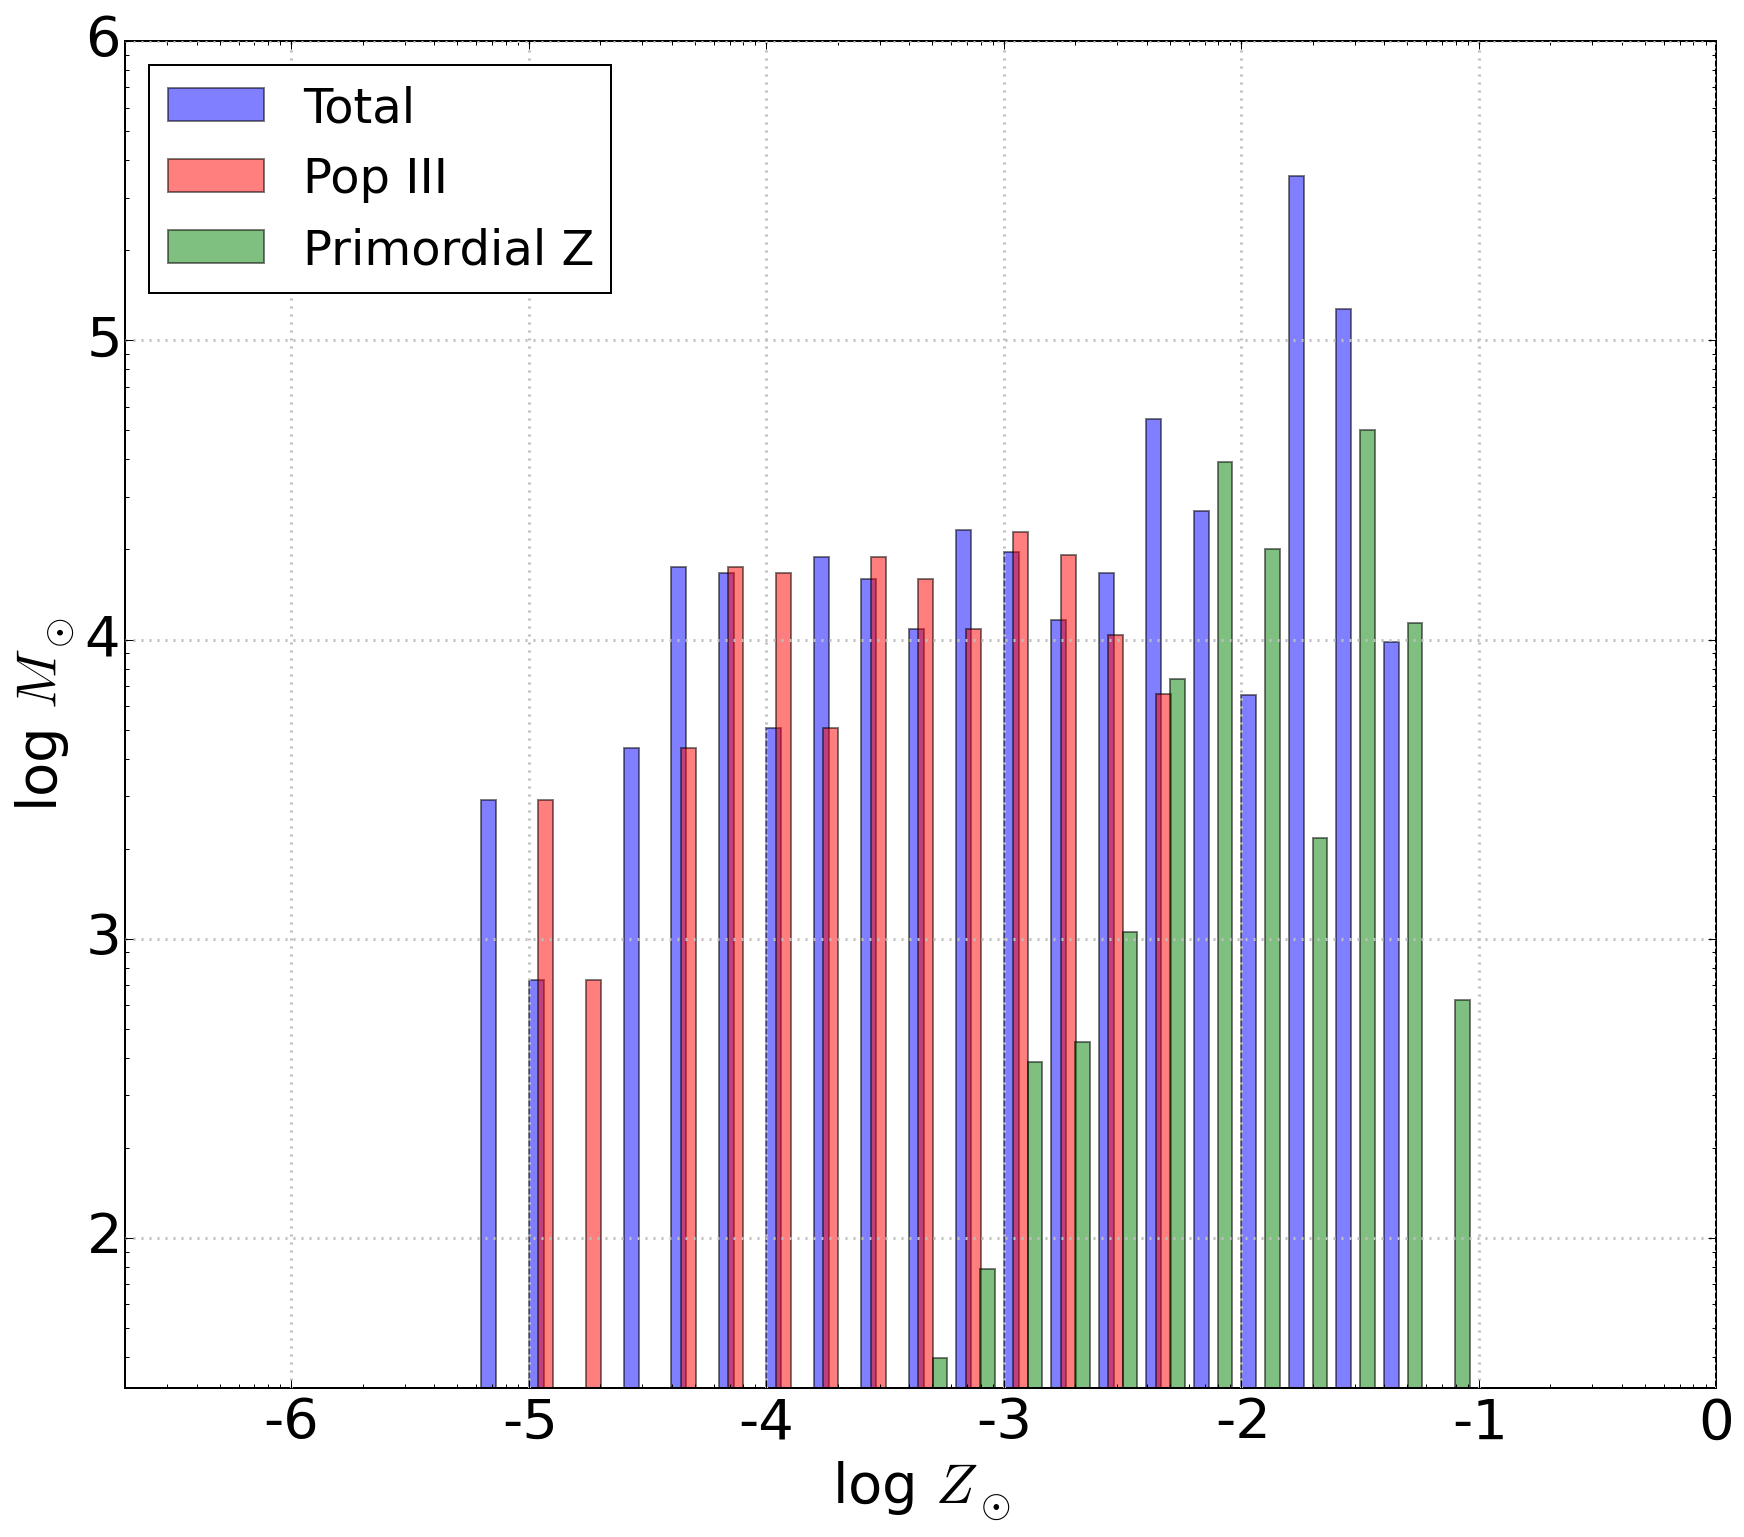

In [69]:
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)
custom_formatter = FuncFormatter(formatter)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([2*10**-7,1])
axHist.set_ylim([10**1.5,10**6.0])

axHist.set_xlabel("log $Z_{\odot}$", size=28)
axHist.set_ylabel('log $M_{\odot}$', size=28)
widthNorm = 6.5
axHist.bar(xrangeb1[0:50],tsm,    color='b', width=xrangeb1[0:50]/widthNorm, log=True, alpha=0.5)
axHist.bar(xrangeb2[0:50],psm,    color='r', width=xrangeb2[0:50]/widthNorm, log=True, alpha=0.5)
axHist.bar(xrangeb3[0:50],primsm, color='g', width=xrangeb3[0:50]/widthNorm, log=True, alpha=0.5)
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total','Pop III','Primordial Z'],loc='upper left', fontsize=24 )
plt.savefig("Hist_HaloData_z="+str(z)+"SFRegion_bar.pdf")
plt.show()